# Clustering

Clustering is a task of identifying clusters of similar data points in the dataset based on distances in feature space. It is very often computed on unlabeled data and so it is an example of unsupervised learning.

# Hierarchical Agglomerative Clustering (HAC)

The idea behind HAC is to build clusters bottom up by unifying closest clusters into a single larger one. This process creates a hierarchy of clusters (dendrogram) and final clustering is obtained by making a 'cut' in the dendrogram.

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() 
np.random.seed(42)

data = pd.DataFrame(columns=["x", "y", "label"])  # prepare dataframe

# generate three clusters
for i, mean_x in enumerate((0, 1, 2)):
    # generate some multivariate normal data
    x = np.random.normal(mean_x, 0.2, 100)
    y = np.random.normal(500, 100, 100)
    #append data to dataframe
    data = data.append(pd.DataFrame({"x": x, "y": y, "label": i}))

<AxesSubplot:xlabel='x', ylabel='y'>

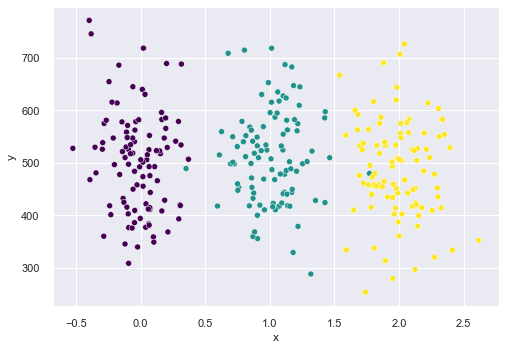

In [216]:
def plot_clusters(data, clusters):
    """
    This function plots clusters

    :param pd.DataFrame data: dataframe with datapoints havig columns "x" and "y"
    :param list of int clusters: cluster label for each of the datapoint
    """

    # plot points and color them by label
    return sns.scatterplot(
        x = "x",
        y = "y",
        data = data,
        hue = clusters,
        palette = "viridis",
        legend = False)

# plot data
plot_clusters(data, data.label)

In [217]:
from sklearn.cluster import AgglomerativeClustering

# remove label column
data_train = data.drop(columns=["label"])  

ac = AgglomerativeClustering(n_clusters=3)  # try to find three clusters in the data
clusters = ac.fit_predict(data_train)  # fit clusters on data

<AxesSubplot:xlabel='x', ylabel='y'>

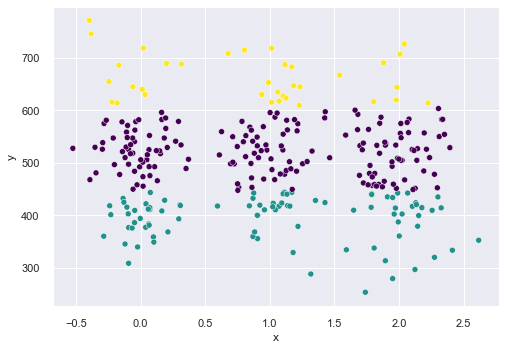

In [218]:
plot_clusters(data, clusters)

This doesn't seem correct. Clustering algorithms are based on distances. And in y-axis distances are much larger than in x-axis. Normalization of features is thus needed.

<AxesSubplot:xlabel='x', ylabel='y'>

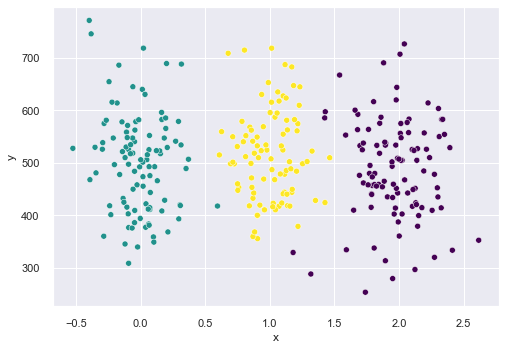

In [219]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler scales axis to interval [0, 1]
pipeline = make_pipeline(MinMaxScaler(), AgglomerativeClustering(n_clusters=3))
clusters = pipeline.fit_predict(data_train)
plot_clusters(data, clusters)

Another way of visualization of HAC is in the form of dendogram. The height of the vertical lines is equivalent to distance between two clusters.

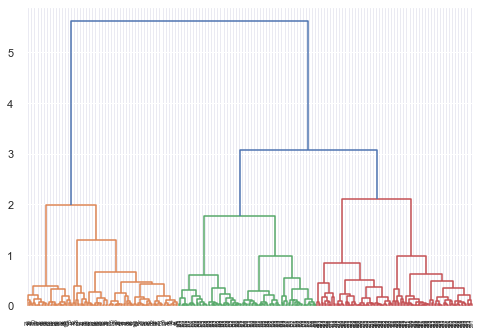

In [220]:
from scipy.cluster.hierarchy import linkage, dendrogram

link = linkage(MinMaxScaler().fit_transform(data_train), "ward")
dn = dendrogram(link, color_threshold=3, distance_sort=True)

# K-means

K-means algorithm relies on iterative optimization of cluster centroids. 

<AxesSubplot:xlabel='x', ylabel='y'>

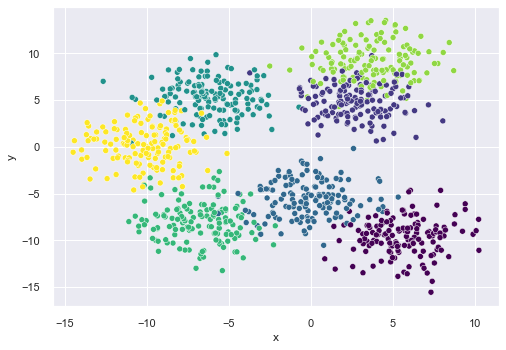

In [221]:
from sklearn.datasets import make_blobs
#create data
X, y = make_blobs(random_state=10, n_samples=1000, centers=7, cluster_std = 2)
data = pd.DataFrame(X, columns=["x", "y"])
data["label"] = y
#visualize data
plot_clusters(data, data.label)

<AxesSubplot:xlabel='x', ylabel='y'>

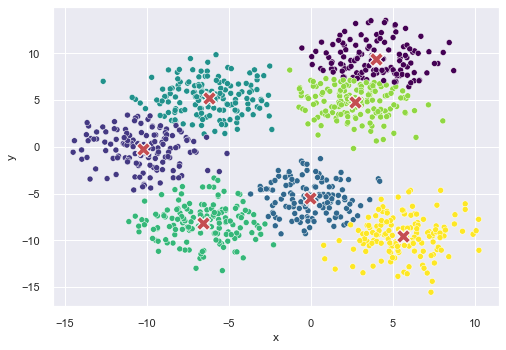

In [222]:
from sklearn.cluster import KMeans

#remove label column
data_train = data.drop("label", axis = 1)

#set KMeans
kmeans = KMeans(n_clusters=7, random_state=i)

#fit and predict data
kmeans.fit(data_train)
clusters = kmeans.predict(data_train)

#visualize data
plot_clusters(data, clusters)

#visualize centroids
sns.scatterplot(
    x = kmeans.cluster_centers_[:, 0],
    y = kmeans.cluster_centers_[:, 1],
    marker = "X",
    color = "r",
    s = 200,
)


Red crosses indicate final centroids of the clusters. Different random states may result in different clusters.

Select the right number of clusters can be tricky, thats why elbow trick is used.

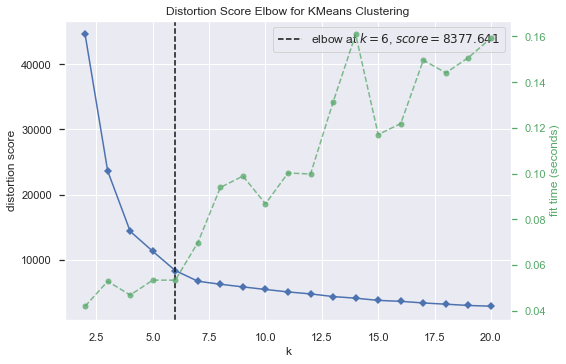

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [223]:
from yellowbrick.cluster import KElbowVisualizer

Elbow = KElbowVisualizer(KMeans(), k = 20)
Elbow.fit(data_train)
Elbow.show()

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Idea behind DBSCAN is that clusters are areas with higher density of points separated by areas of lower densities. It does not need to specify number of clusters in advance, and is insensitive to outliers (K-means and HAC can be affected). 

The disadvantage of DBSCAN lies in hyperparametr tuning. 

<AxesSubplot:xlabel='x', ylabel='y'>

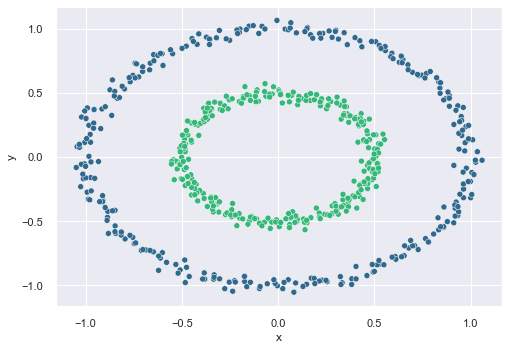

In [224]:
from sklearn.datasets import make_circles

#create and visualize data
X, y = make_circles(random_state=10, n_samples=600, noise = 0.03, factor=0.5)
circles = pd.DataFrame(X, columns=["x", "y"])
circles["label"] = y
plot_clusters(circles, circles.label)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

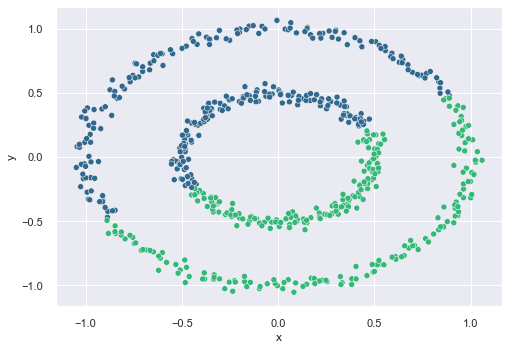

In [225]:
circles_train = circles.drop(columns="label")
km = KMeans(n_clusters=2)
km.fit(circles_train)

#show clusters based on KMeans algorithm
plot_clusters(circles, km.labels_)

<AxesSubplot:xlabel='x', ylabel='y'>

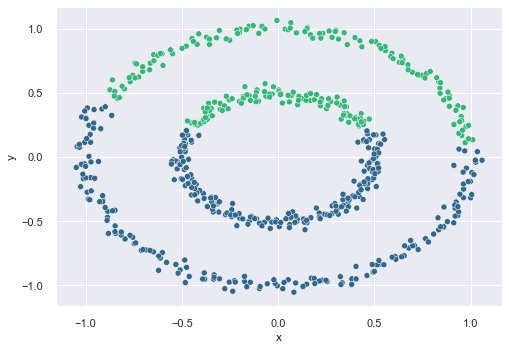

In [226]:
hac = AgglomerativeClustering(n_clusters=2)
hac.fit(circles_train)

#show clusters based on HAC algorithm
plot_clusters(circles, hac.labels_)

Neither HAC nor K-means were able to cluster this data set correctly. 

<AxesSubplot:xlabel='x', ylabel='y'>

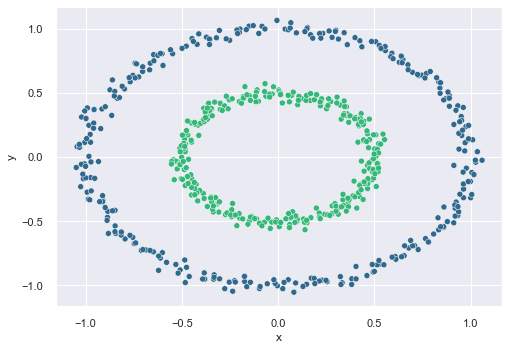

In [227]:
from sklearn.cluster import DBSCAN

#fit and visualize clusters based on DBSCAN algorithm
dbscan = DBSCAN(eps = 0.1)
dbscan.fit(circles_train)
plot_clusters(circles, dbscan.labels_)

THE DBSCAN algorithm fits this problem much better.